In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Docs for collab/Credit fraud/fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
# getting the info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## **Data Preprocessing**

In [ ]:
# Checking the null values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
# finding the DOB's
df["dob"] = pd.to_datetime(df["dob"])
today = pd.Timestamp('today')
df['age'] = today.year - df['dob'].dt.year
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,36
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,46
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,62
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,57
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,38


In [ ]:
# dropping the irrelevent columns
df.drop(columns=['Unnamed: 0','trans_num','merch_lat','merch_long','trans_date_trans_time','dob'],inplace=True)

In [ ]:
print("Normal Transactions count(%) :",(df['is_fraud'].value_counts()[0]/df.shape[0])*100,'%')
print("Fraud Transactions count(%)  :",(df['is_fraud'].value_counts()[1]/df.shape[0])*100,'%')

Normal Transactions count(%) : 99.42113482561166 %
Fraud Transactions count(%)  : 0.5788651743883394 %


It is an imbalanced dataset so we need to balance this

In [ ]:
# description of the datset
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,is_fraud,age
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,5.788652e-03,5.074255e+01
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,7.586269e-02,1.737848e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,0.000000e+00,1.900000e+01
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,0.000000e+00,3.700000e+01
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,0.000000e+00,4.900000e+01
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,0.000000e+00,6.200000e+01
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,1.000000e+00,1.000000e+02


In [ ]:
# getting unique values by column wise
def unique(columns):
  for col in columns:
    print('Column Name :',col)
    print('Unique Values :',int(df[f'{col}'].nunique()))
    print('=============================================================================')

In [ ]:
unique(list(df.columns))

Column Name : cc_num
Unique Values : 983
Column Name : merchant
Unique Values : 693
Column Name : category
Unique Values : 14
Column Name : amt
Unique Values : 52928
Column Name : first
Unique Values : 352
Column Name : last
Unique Values : 481
Column Name : gender
Unique Values : 2
Column Name : street
Unique Values : 983
Column Name : city
Unique Values : 894
Column Name : state
Unique Values : 51
Column Name : zip
Unique Values : 970
Column Name : lat
Unique Values : 968
Column Name : long
Unique Values : 969
Column Name : city_pop
Unique Values : 879
Column Name : job
Unique Values : 494
Column Name : unix_time
Unique Values : 1274823
Column Name : is_fraud
Unique Values : 2
Column Name : age
Unique Values : 81


### **Encoding the categorical values**

In [ ]:
cat_var = ['merchant','category','first','last','gender','street','city','state','zip','job']

In [ ]:
encoder = LabelEncoder()
for col in cat_var:
  df[f'{col}'] = encoder.fit_transform(df[f'{col}'])

In [ ]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,is_fraud,age
0,2703186189652095,514,8,4.97,162,18,0,568,526,27,265,36.0788,-81.1781,3495,370,1325376018,0,36
1,630423337322,241,4,107.23,309,157,0,435,612,47,965,48.8878,-118.2105,149,428,1325376044,0,46
2,38859492057661,390,0,220.11,115,381,1,602,468,13,858,42.1808,-112.2620,4154,307,1325376051,0,62
3,3534093764340240,360,2,45.00,163,463,1,930,84,26,614,46.2306,-112.1138,1939,328,1325376076,0,57
4,375534208663984,297,9,41.96,336,149,1,418,216,45,231,38.4207,-79.4629,99,116,1325376186,0,38


### **Balance the dataset using Oversampling**

In [ ]:
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

In [ ]:
# using smote oversampling method
smote = SMOTE(
    sampling_strategy='auto',
    random_state = 0,
    k_neighbors = 3
)
x_res,y_res = smote.fit_resample(X,y)

In [ ]:
data = pd.concat([x_res,y_res],axis=1)
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,age,is_fraud
0,2703186189652095,514,8,4.97,162,18,0,568,526,27,265,36.0788,-81.1781,3495,370,1325376018,36,0
1,630423337322,241,4,107.23,309,157,0,435,612,47,965,48.8878,-118.2105,149,428,1325376044,46,0
2,38859492057661,390,0,220.11,115,381,1,602,468,13,858,42.1808,-112.2620,4154,307,1325376051,62,0
3,3534093764340240,360,2,45.00,163,463,1,930,84,26,614,46.2306,-112.1138,1939,328,1325376076,57,0
4,375534208663984,297,9,41.96,336,149,1,418,216,45,231,38.4207,-79.4629,99,116,1325376186,38,0


Now it's a balanced dataset

## **Exploratory Data Analysis**

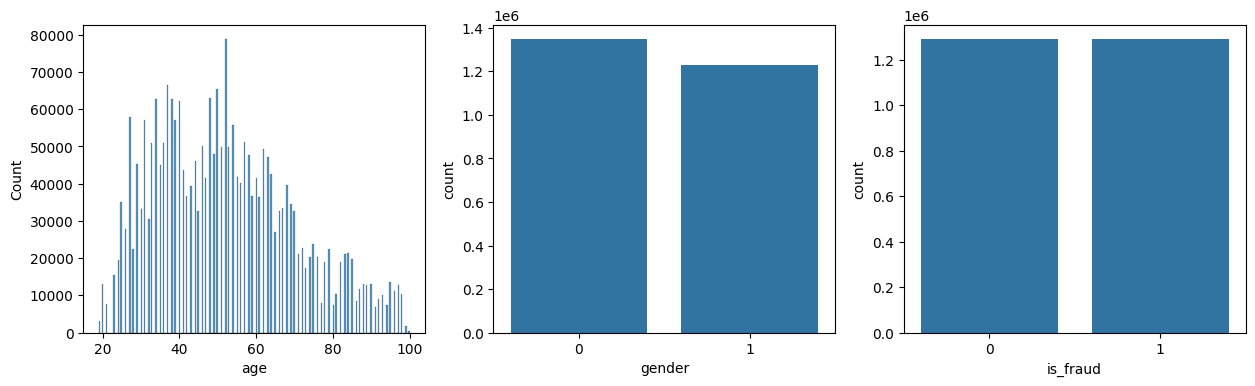

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(15,4))
sns.histplot(data,x='age',ax=ax[0])
sns.countplot(data,x='gender',ax=ax[1])
sns.countplot(data,x='is_fraud',ax=ax[2])
plt.show()

<p> Plot 1 highlights that the majority of the customers fall within the 25 to 65 years age range.</p>
<p> Plot 2 reveals that a significant portion of the customers are Females.</p>
<p> Plot 3 is the proof of our oversampling method for imbalanced dataset.</p>

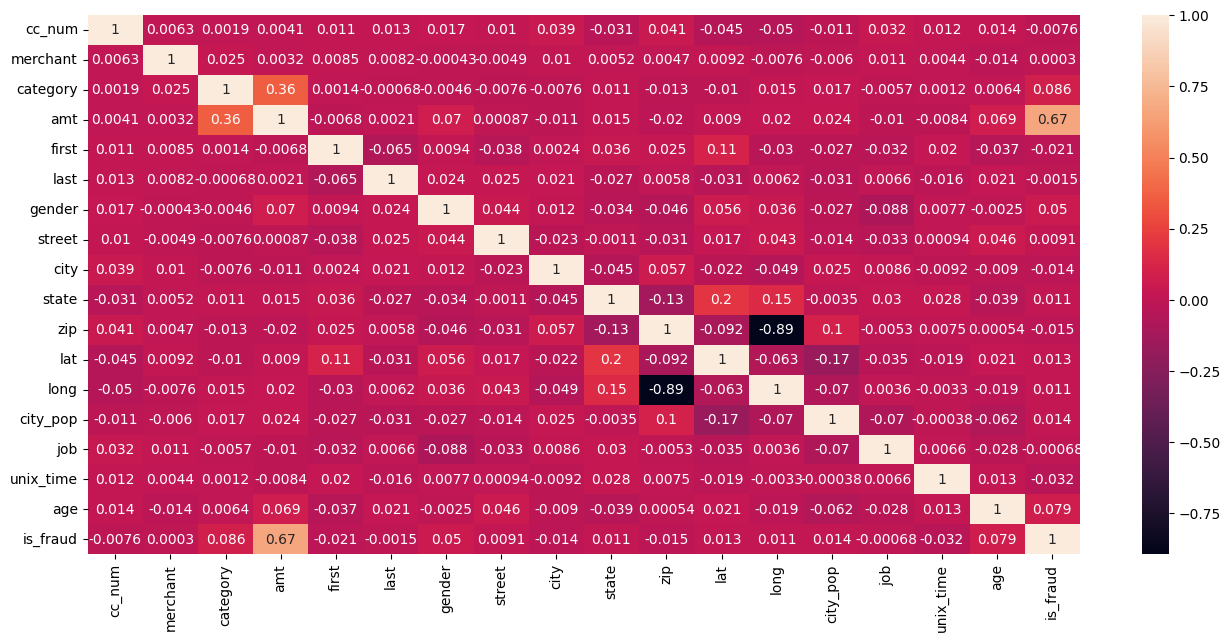

In [ ]:
# Correlation matrix
fig, ax = plt.subplots(1,1,figsize=(16,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
# Removing unwanted columns identified from above heatmap
data.drop(columns=['cc_num','merchant','street','state','first','last','long','lat','job','unix_time','city_pop'],inplace=True)
data.head()

,category,amt,gender,city,zip,age,is_fraud
0,8,4.97,0,526,265,36,0
1,4,107.23,0,612,965,46,0
2,0,220.11,1,468,858,62,0
3,2,45.00,1,84,614,57,0
4,9,41.96,1,216,231,38,0


In [ ]:
# Features and target spliting
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

In [ ]:
# spliting the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("Training sample size :",X_train.shape)
print("Test sample size :",X_test.shape)

Training sample size : (2062670, 6)
Test sample size : (515668, 6)


## **Model Building**

### **Logistic Regression**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
print("Training set accuracy :",model_lr.score(X_train,y_train))
print("Test set accuracy :",model_lr.score(X_test,y_test))

Training set accuracy : 0.8822826724585126
Test set accuracy : 0.8823332066368283


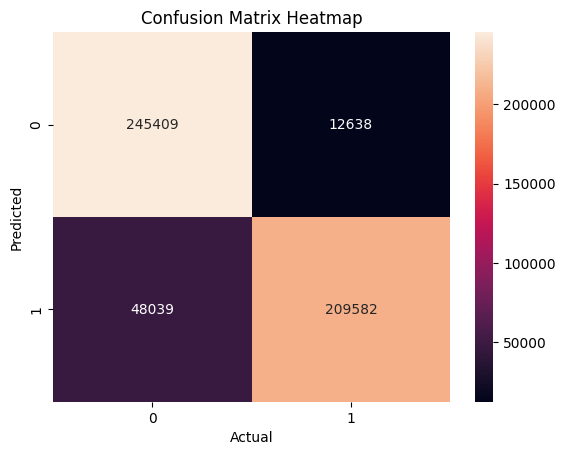

In [ ]:
# Confusion Matrix
y_pred = model_lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89    258047
           1       0.94      0.81      0.87    257621

    accuracy                           0.88    515668
   macro avg       0.89      0.88      0.88    515668
weighted avg       0.89      0.88      0.88    515668



### **Decision Tree**

In [ ]:
model_dtc = DecisionTreeClassifier(max_depth=20)
model_dtc.fit(X_train,y_train)
print('Training set Score :',model_dtc.score(X_train,y_train))
print('Test set Score :',model_dtc.score(X_test,y_test))

Training set Score : 0.9642361599286362
Test set Score : 0.9528650216806163


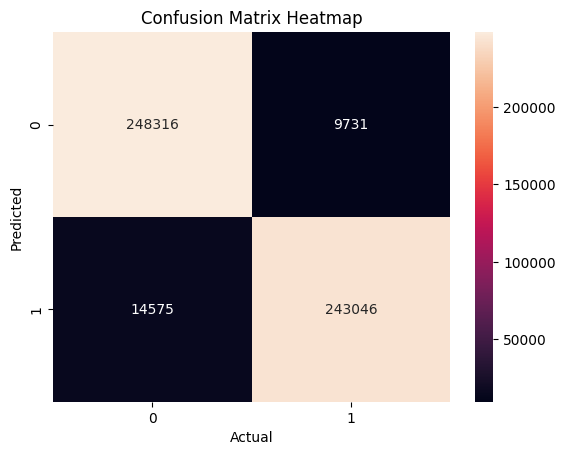

In [ ]:
# Confusion Matrix
y_pred = model_dtc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    258047
           1       0.96      0.94      0.95    257621

    accuracy                           0.95    515668
   macro avg       0.95      0.95      0.95    515668
weighted avg       0.95      0.95      0.95    515668



### **Random Forest**

In [ ]:
model_rfc = RandomForestClassifier(n_estimators=20,max_depth=20)
model_rfc.fit(X_train,y_train)
print('Training set Score :',model_rfc.score(X_train,y_train))
print('Test set Score :',model_rfc.score(X_test,y_test))

Training set Score : 0.9708237381646119
Test set Score : 0.9616458651690623


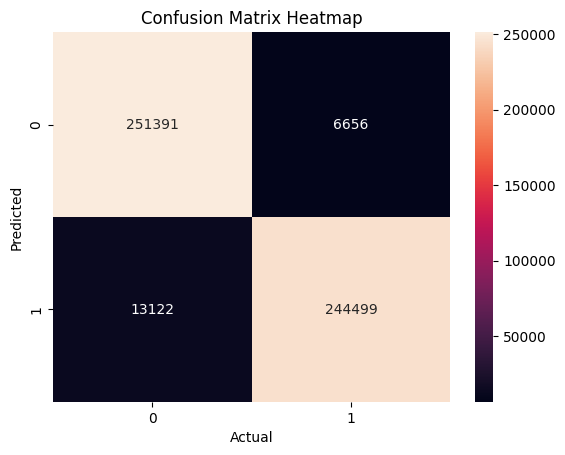

In [ ]:
# Confusion Matrix
y_pred = model_rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Classification Report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    258047
           1       0.97      0.95      0.96    257621

    accuracy                           0.96    515668
   macro avg       0.96      0.96      0.96    515668
weighted avg       0.96      0.96      0.96    515668

